<h1> <b> Lab - 6 </b> </h1>
<h3>PCA</h3>
<br>

In [1]:
# Linear algebra library
import numpy as np 

# library for visualization
import matplotlib.pyplot as plt

# PCA library
from sklearn.decomposition import PCA

# Data frame library
import pandas as pd

# Library for math functions
import math 
import random

<br/><h2> <b> Taking random numbers x and y. Making them correlated to each other.</b> </h2><br/>

In [2]:
# The amount of the correlation
n = 1 

# Generate 1000 samples from a uniform random variable
x = np.random.uniform(1, 2, 1000) 

# Make y = n * x
y = x.copy() * n 

<br/><h2> <b> PCA works better if data is centered. So, we are removing mean from the data. </b> </h2><br/>

In [3]:
# Center x. Remove its mean
x = x - np.mean(x) 

# Center y. Remove its mean
y = y - np.mean(y) 

<br/><h2> <b> Create a data frame using x and y. Plot the graph of the original dataset.</b> </h2><br/>

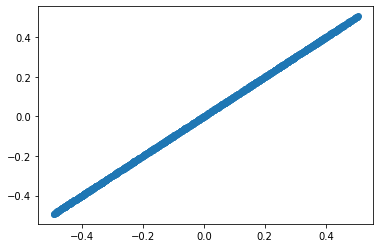

In [4]:
# Create a data frame with x and y
data = pd.DataFrame({'x': x, 'y': y}) 

# Plot the original correlated data in blue
plt.scatter(data.x, data.y) 

<br/><h2> <b> Instantiate a PCA. Choosing to get 2 output variables. </b> </h2><br/>

In [5]:
pca = PCA(n_components = 2)

<br/><h2> <b> Creating a transformation model for this data. </b> </h2><br/>

In [6]:
pcaTr = pca.fit(data)

<br/><h2> <b> Transform the data base on the rotation matrix of pcaTr. </b> </h2><br/>

In [7]:
rotatedData = pcaTr.transform(data)

<br/><h2> <b> Creating a data frame with new variables naming them as PC1 and PC2. </b> </h2><br/>

In [8]:
dataPCA = pd.DataFrame(data = rotatedData, columns = ['PC1', 'PC2'])

<br/><h2> <b> Plot the transformed data in orange. </b> </h2><br/>

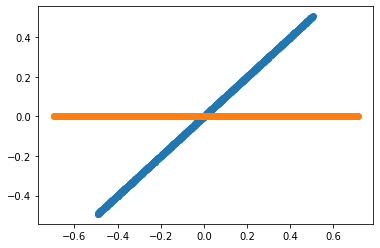

In [9]:
# Plot the original correlated data in blue
plt.scatter(data.x, data.y)

# plot the transformed data in orange
plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.show()

<br/><h2> <b> Finding the Eigenvectors and Eigenvalues. </b> </h2><br/>

In [11]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)
print('\nEigenvalues or explained variance')
print(pcaTr.explained_variance_)

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

Eigenvalues or explained variance
[1.66886270e-01 1.85406818e-33]


<br/><h2> <b> Creating a random variables with desired variances. </b> </h2><br/>

In [12]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

random.seed(100)

# The desired standard deviation of our first random variable
std1 = 1 

# The desired standard deviation of our second random variable
std2 = 0.333

# Get 1000 samples from x ~ N(0, std1)
x = np.random.normal(0, std1, 1000) 

# Get 1000 samples from y ~ N(0, std2)
y = np.random.normal(0, std2, 1000) 

<br/><h2> <b> PCA works better if data is centered. So, we are removing mean from the data. </b> </h2><br/>

In [13]:
# Center x
x = x - np.mean(x)

# Center y
y = y - np.mean(y) 

<br/><h2> <b> Defining a pair of dependent variables with desired amount of covariance. </b> </h2><br/>

In [14]:
# Magnitude of covariance.
n = 1 

# Convert the covariance to and angle
angle = np.arctan(1 / n)
 
print('angle: ', angle * 180 / math.pi)

angle:  45.0


<br/><h2> <b> Creating a rotation matrix using the given angle. </b> </h2><br/>

In [15]:
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
[-np.sin(angle), np.cos(angle)]])

print('rotationMatrix')
print(rotationMatrix)

rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


<br/><h2> <b> Creating a matrix with columns x and y. </b> </h2><br/>

In [16]:
xy = np.concatenate(([x] , [y]), axis=0).T 

<br/><h2> <b> Transforming the data using the rotation matrix. Plotting the graph of rotated data. </b> </h2><br/>

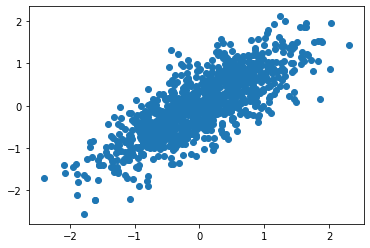

In [17]:
data = np.dot(xy, rotationMatrix)

# Print the rotated data
plt.scatter(data[:,0], data[:,1])
plt.show()

<br/><h2> <b> Applying PCA and finding the Eigenvecgtors and Eigenvalues. </b> </h2><br/>

In [18]:
# Instantiate a PCA. Choose to get 2 output variables
pca = PCA(n_components = 2)

# Create the transformation model for this data. Internally it gets the rotation
# matrix and the explained variance
pcaTr = pca.fit(data)

# Create an array with the transformed data
dataPCA = pcaTr.transform(data)
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)
print('\nEigenvalues or explained variance')
print(pcaTr.explained_variance_)

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.70906821 -0.7051399 ]
 [-0.7051399   0.70906821]]

Eigenvalues or explained variance
[1.01224813 0.11891726]


<br/><h2> <b> Plot the graph of original data in blue and rotated data in orange. </b> </h2><br/>

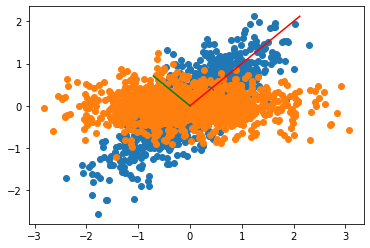

In [19]:
# Print the original data in blue
plt.scatter(data[:,0], data[:,1])

# Print the rotated data
plt.scatter(dataPCA[:,0], dataPCA[:,1])

# Plot the first component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0, rotationMatrix[0][1] * std1 * 3], 'k', color='red')

# Plot the second component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0, rotationMatrix[1][1] * std2 * 3], 'k', color='green')
plt.show()

<br/><h2> <b> Dimensionality Reduction. </b> </h2><br/>

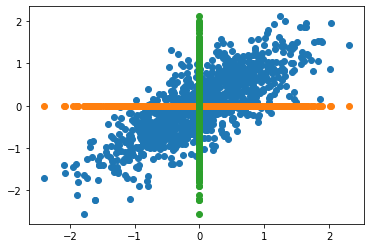

In [20]:
nPoints = len(data)

# Plot the original data in blue
plt.scatter(data[:,0], data[:,1])

#Plot the projection along the first component in orange
plt.scatter(data[:,0], np.zeros(nPoints))

#Plot the projection along the second component in green
plt.scatter(np.zeros(nPoints), data[:,1])
plt.show()